# Исследование рынка кинопроката

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-типов-данных" data-toc-modified-id="Проверка-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка типов данных</a></span></li><li><span><a href="#Обработка-пропусков-в-датафрейме" data-toc-modified-id="Обработка-пропусков-в-датафрейме-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков в датафрейме</a></span></li><li><span><a href="#Обработка-дубликатов-в-датафрейме" data-toc-modified-id="Обработка-дубликатов-в-датафрейме-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов в датафрейме</a></span></li><li><span><a href="#Проверка-категориальных-значений" data-toc-modified-id="Проверка-категориальных-значений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка категориальных значений</a></span></li><li><span><a href="#Проверка-количественных-значений" data-toc-modified-id="Проверка-количественных-значений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проверка количественных значений</a></span></li><li><span><a href="#Добавление-новых-столбцов" data-toc-modified-id="Добавление-новых-столбцов-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Добавление новых столбцов</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Исследование-фильмов,-которые-получили-государственную-поддержку" data-toc-modified-id="Исследование-фильмов,-которые-получили-государственную-поддержку-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование фильмов, которые получили государственную поддержку</a></span></li><li><span><a href="#Выводы-по-исследованию" data-toc-modified-id="Выводы-по-исследованию-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы по исследованию</a></span></li></ul></div>

## Общая информация о данных 

В рамках проекта необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить особое внимание фильмам, которые получили государственную поддержку. 
Данные, взятые для анализа, опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/mkrf_movies.csv')
data_2 = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data_2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [5]:
data_2['box_office'] = data_2['box_office']/1000000  # Переведем значения в колонке со сборами в млн.руб

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Заменим значение "нет" в колонке *puNumber* на 0 (чтобы можно было перевести столбец в числовой тип)

In [8]:
data.loc[data['puNumber'] == 'нет', ['puNumber']] = 0

In [9]:
data = data.astype({'puNumber' : int})
data.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

In [10]:
data = data.merge(data_2, on='puNumber', how='left')

In [11]:
data_2['box_office'].isna().sum()

0

In [12]:
data['box_office'].isna().sum()

4328

In [13]:
len(data)

7486

Итоговый датафрейм состоит из 7486 строк. Все значения из файла mkrf_shows вошли в состав нового датафрейма, но не для всех значений из mkrf_movies нашлись значения в mkrf_shows.

## Предобработка данных

### Проверка типов данных


In [14]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


1. Откорректируем значения в колонке *age_restriction*. Оставим только количество лет, начиная с которых можно смотреть фильм;
2. Приведем дату к приемлемому виду;
3. Изменим тип данных в колонке *ratings* на float;
4. Изменим тип данных в колонках *refundable_support, nonrefundable_support, budget, box_office* на int (после заполнения пропусков).

In [15]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [16]:
data.loc[data['age_restriction'] == '«18+» - запрещено для детей', ['age_restriction']] = '18+'
data.loc[data['age_restriction'] == '«6+» - для детей старше 6 лет', ['age_restriction']] = '6+'
data.loc[data['age_restriction'] == '«12+» - для детей старше 12 лет', ['age_restriction']] = '12+'
data.loc[data['age_restriction'] == '«16+» - для детей старше 16 лет', ['age_restriction']] = '16+'
data.loc[data['age_restriction'] == '«0+» - для любой зрительской аудитории', ['age_restriction']] = '0+'

In [17]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y.%m.%dT%H:%M:%S')

In [18]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


In [19]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видно, что колонка *ratings* содержит рейтинги в процентах помимо дробных чисел. Очевидно, что рейтинг 97% означает 9,7. Найдем все значения с процентами и переведем их дробные рейтнги.

In [20]:
data['ratings'] = data['ratings'].str.replace('%', '').astype(float)

In [21]:
data['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [22]:
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings']/10

In [23]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [24]:
data.dtypes

title                                 object
puNumber                               int64
show_start_date          datetime64[ns, UTC]
type                                  object
film_studio                           object
production_country                    object
director                              object
producer                              object
age_restriction                       object
refundable_support                   float64
nonrefundable_support                float64
budget                               float64
financing_source                      object
ratings                              float64
genres                                object
box_office                           float64
dtype: object

### Обработка пропусков в датафрейме

Посмотрим, в каких колонках имеются пропущенные значения и сколько их.

In [25]:
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [26]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

**film_studio** 
<br>Пропуски в данной колонке невозможно восстановить, используя имеющиеся данные. Данные пропуски не будут играть большое значение в дальнейшем анализе. Заполним значением "не определено".

In [27]:
data['film_studio'] = data['film_studio'].fillna('не определено')

In [28]:
data.query('film_studio.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**production_country**

In [29]:
data.query('production_country.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",0+,NaN,NaN,NaN,NaN,7.2,"детский,комедия",0.194527
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,не определено,NaN,NaN,NaN,0+,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Оба фильма были сняты в России

In [30]:
data['production_country'] = data['production_country'].fillna('Россия')

**director**
<br> По большей части без режисеров концерты. Заполним пропуска на "отсутствует"

In [31]:
data['director'] = data['director'].fillna('отсутствует')

In [32]:
data.query('director.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


**producer**
<br>Пропуски в этой колонке также заполним "не определено"

In [33]:
data['producer'] = data['producer'].fillna('не определено')

**refundable_support, nonrefundable_support, budget, financing_source**
<br>Пропуски в данных колонках указывают на отсутствие российской господдержки у фильма. Заменим пропуски в колонках *refundable_support, nonrefundable_support, budget* на 0 (позже исправим нули в *budget* на более адекватные значения), а в колонке *financing_source* на "нет". Переведем колонки в формат int

In [34]:
data.query('budget == 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.234016
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446.163511
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196.572438
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67.418975
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.487551
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",72.937783
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,15.362931
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",70.299052
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1038.321489


In [35]:
data.query('~refundable_support.isna()')['financing_source'].unique()

array(['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [36]:
data[['refundable_support', 'nonrefundable_support', 'budget']] = (
    data[['refundable_support', 'nonrefundable_support', 'budget']].fillna(0))

data['financing_source'] = data['financing_source'].fillna('нет')

data[['refundable_support', 'nonrefundable_support', 'budget']] = (
    data[['refundable_support', 'nonrefundable_support', 'budget']].astype(int))

**ratings, genres**
<br>Нет возможност заполнить по имеющимся данным. Оставим пропуски

In [37]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source            0
ratings                   967
genres                    976
box_office               4328
dtype: int64

**box_office**
<br>Оставим пропуски

### Обработка дубликатов в датафрейме

In [38]:
data.duplicated().sum()

0

Полностью идентичных строк нет. Есть фильмы, которые имеют несколько дат проката. Скорее всего это вызвано повторными премьерами в кинотеатрах. Имеются строки с одинаковыми значениями в колонках *title, financing_source, ratings, box_office*.

In [39]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0,0,0,нет,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не определено,6+,0,0,0,нет,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0,0,0,нет,6.8,"фантастика,боевик,триллер",NaN


In [40]:
data[data.duplicated(['puNumber'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",16+,0,0,0,нет,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12+,0,0,0,нет,6.8,"комедия,криминал",NaN


In [41]:
display(data[data.duplicated(['title', 'box_office'])].query('budget != 0'))
len(data[data.duplicated(['title', 'box_office'])].query('box_office != 0'))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",12+,100000000,400000000,944000000,Фонд кино,5.7,"фантастика,боевик",NaN


508

In [42]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(data)                
print(a, b, round((a-b)/a*100, 2))

7486 7486 0.0


### Проверка категориальных значений

In [43]:
set(data['director'])

{'Дени Аркан',
 'Тео Пирри',
 'Сэфи Неббу',
 'Джастин Закэм',
 'Стюарт Маундер',
 'Эндрю Адамсон',
 'Дмитрий Черняков',
 'В.Титов',
 'Ли Кронин',
 'Эндрю Эрвин, Джон Эрвин',
 'А.Розов',
 'Стивен Кижак',
 'Я.Войтова, И.Черджиева',
 'О.Массарыгин',
 'Малик Бейдер',
 'П.Смирнов',
 'В.Сигарев',
 'Г.Болдугеров',
 'Айрис Заки',
 'Лора Пойтрас',
 'Нестор Саенц Кампос',
 'Уте фон Мюнхов-Поль',
 'Джоэл Потрикус',
 'Кловис Корнийяк',
 'Гарт Дэвис',
 'Л.Горовец',
 'Брайан Лардж',
 'Курт Мэттила, Мэтт Чековски',
 'Ю.Васильев',
 'Анхель Грация',
 'Грег Тирнан, Конрад Вернон',
 'Ли Даниэлс',
 'Дерек Сиенфрэнс',
 'И.Пырьев',
 'О.Арлаускас, Г.Петросян, С.Горло',
 'Пьер Коффин, Крис Рено',
 'Феликс Фуксштайнер, Катарина Шёде',
 'Ю.Ардашев',
 'Ол Паркер',
 'Е.Салабай, Е.Шабанова, А.Соколов, И.Пшонкин и др.',
 'Джеф Треймейн',
 'А.Берденников',
 'Н.Меркулова, А.Чупов',
 'Конрад Вернон, Грег Тирнан',
 'Хирокадзу Корээда',
 'Такуя Игараси',
 'Р.Мосафир',
 'Джеральд Рашинато',
 'К.Хрестинин',
 'Кит Уорнер',

В категориальных столбцах имеет место проблема разного транслитерирования иностранных собственных имен, например режиссер двух фильмов "Анализируй это!" и "Анилизируй то!" в одном случае записан как Гарольд Реймис, а в другом как ХЭрольд Рэмис. Помимо этого где-то указаны инициалы вместо имен. Также много строк, где указано несколько режиссеров, продюссеров и студий.

In [44]:
data.query('title in ["Анализируй это!", "Анализируй то!"]')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310,2010-12-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16+,0,0,0,нет,7.4,"комедия,криминал",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",16+,0,0,0,нет,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",12+,0,0,0,нет,6.8,"комедия,криминал",NaN


In [45]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В колонке *type* есть значения с пробелом перед названием жанра. Устраним

In [46]:
data['type'] = data['type'].str.strip()
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [47]:
data['financing_source'].value_counts()

нет                                 7154
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

In [48]:
data['age_restriction'].value_counts()

16+    2851
18+    1605
12+    1593
0+      811
6+      626
Name: age_restriction, dtype: int64

### Проверка количественных значений

In [49]:
data.query('budget < refundable_support + nonrefundable_support').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0,23000000,0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.234016
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0,75000000,0,Фонд кино,6.6,драма,446.163511
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,10000000,70000000,0,Фонд кино,7.8,"боевик,драма,криминал",196.572438
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,20000000,0,0,Фонд кино,6.2,"комедия,фэнтези",67.418975
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,60000000,100000000,0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.487551


In [50]:
len(data.query('budget < refundable_support + nonrefundable_support'))

17

В имеющихся данных есть 17 строк, где бюджет фильма равен нулю, при этом у него имеется господдержка. Эти строки лучше заполнить суммой возвратных и невозвратных средств господдержки, помноженной на среднюю долю господдержки в бюджете.

In [51]:
a_temp = data.query('refundable_support + nonrefundable_support > 0')            # оставим данные с известной господдержкой

(a_temp['refundable_support'] + a_temp['nonrefundable_support']).mean() / a_temp['budget'].mean() # рассчитаем среднюю долю 
                                                                                                  # господдержки в фильмах

0.47823298132573816

In [52]:
a_temp.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",0.365354
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0,26000000,37142857,Министерство культуры,NaN,NaN,0.028140
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",19.957031
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,16+,0,28000000,40574140,Министерство культуры,4.2,драма,0.055918
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",16+,0,25000000,40015122,Министерство культуры,6.4,драма,0.232100


In [53]:
data.loc[data['budget'] < data['refundable_support'] + data['nonrefundable_support'], 'budget'] = (
    (data['refundable_support'] + data['nonrefundable_support']) / 0.478)

In [54]:
len(data.query('budget != 0'))

332

In [55]:
len(data.query('(budget == refundable_support + nonrefundable_support) & (budget != 0)'))

0

In [56]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.486000e+03,7.486000e+03,7.486000e+03,7.486000e+03,6519.000000,3158.000000
mean,1.351785e+08,5.261822e+05,2.172280e+06,6.031570e+06,6.488173,76.478696
std,3.838218e+07,5.781108e+06,1.614894e+07,4.858171e+07,1.114638,240.353123
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,1.120250e+08,0.000000e+00,0.000000e+00,0.000000e+00,5.900000,0.086239
50%,1.210155e+08,0.000000e+00,0.000000e+00,0.000000e+00,6.600000,2.327988
75%,1.240033e+08,0.000000e+00,0.000000e+00,0.000000e+00,7.200000,23.979671
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3073.568691


### Добавление новых столбцов


Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [57]:
data['year'] = data['show_start_date'].dt.year

In [58]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0,0,0.0,нет,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не определено,6+,0,0,0.0,нет,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0,0,0.0,нет,6.8,"фантастика,боевик,триллер",NaN,2016


Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [59]:
data['first_director'] = data['director'].str.split(',').str.get(0)
data['first_genre'] = data['genres'].str.split(',').str.get(0)
data['first_director'] = data['first_director'].str.strip() # Удалим пробелы в начале и конце

In [60]:
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0,0,0.0,нет,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не определено,6+,0,0,0.0,нет,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,0,0,0.0,нет,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика


Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [61]:
data['support_share'] = round((data['refundable_support'] + data['nonrefundable_support']) / data['budget'], 2)
data['support_share'] = data['support_share'].fillna(0)

In [62]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genre,support_share
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,0,0,0.0,нет,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,0.0
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,не определено,6+,0,0,0.0,нет,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,0.0


## Исследовательский анализ данных


Посмотрим, сколько фильмов выходило в прокат каждый год. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. 
<br>Заменим пропущенные значения в *box_office* на 0 (чтобы не вызвать ошибки в дальнейшем коде). Строк, где указано, что сборы = 0 мало, поэтому примем, что значение 0 будет означать, что данных по сборам нет.

In [63]:
len(data.query('box_office == 0'))

24

In [64]:
data['box_office'] = data['box_office'].fillna(0)

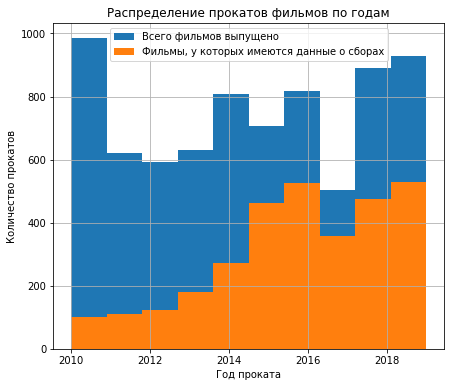

In [65]:
data['year'].hist(bins=10, label='Всего фильмов выпущено', figsize = (7, 6))
data.query('box_office > 0')['year'].hist(bins=10, label='Фильмы, у которых имеются данные о сборах')

plt.title('Распределение прокатов фильмов по годам')
plt.xlabel('Год проката')
plt.ylabel('Количество прокатов')
plt.legend()
plt.show()

In [66]:
data.query('box_office > 0')['year'].value_counts()

2019    530
2016    525
2018    475
2015    462
2017    357
2014    273
2013    179
2012    123
2011    109
2010    101
Name: year, dtype: int64

year
2010    0.102538
2011    0.175241
2012    0.207420
2013    0.284127
2014    0.338290
2015    0.655319
2016    0.641809
2017    0.706931
2018    0.533109
2019    0.569892
Name: box_office, dtype: float64

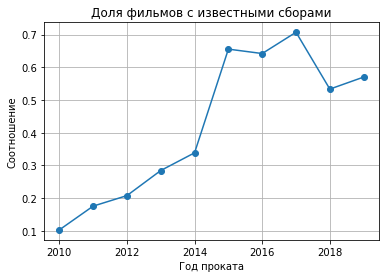

In [67]:
temp = data.groupby('year')['box_office'].apply(lambda x: (x > 0).sum() / x.count())
display(temp)
temp.plot(
    style='o-', grid=True, 
    title='Доля фильмов с известными сборами', 
    xlabel='Год проката', 
    ylabel='Соотношение');

Как видно из гистограммы, наибольшее количество фильмов был выпущено в прокат в 2010, 2018 и 2019 годах, а наименьшее в 2017 году. Нетрудно заметить тенденцию роста (от года к году) как общего количества выпускаемых фильмов, так и количества фильмов с известными сборами. Отчасти просадка по фильмам в 2017 году может быть связана как со скандалами в голливуде (когда репутация киноиндустрии была подорвана), так и с проблемами в российской киноиндустрии (например скандал с "Матильдой"). Наибольшая доля фильмов с известнымми сборами приходится именно на 2017 год.

Посмотрим, как менялась динамика проката по годам.

year
2010        2.428654
2011       14.102765
2012        6.955423
2013       29.799706
2014     7444.951859
2015    39497.365196
2016    47866.299742
2017    48563.707218
2018    49668.403134
2019    48425.708780
Name: box_office, dtype: float64

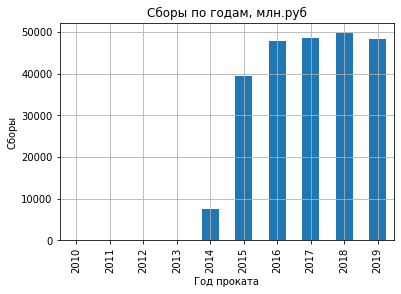

In [68]:
temp = data.groupby('year')['box_office'].apply(lambda x: x.sum())
display(temp)
temp.plot(
    kind='bar', grid=True, 
    title='Сборы по годам, млн.руб',
    xlabel='Год проката', 
    ylabel='Сборы');

Больше всех денег удалось собрать в 2018 году (49,7 млрд.руб). Меньше всех в 2010 (2,4 млн.руб). Во многом это связано с инфляцией (удорожанием билетов) и ростом раскрытия информации по сборам (ранее было приняты за 0 отсутствующие значения по сборам).

In [69]:
data.pivot_table(index='year', values='box_office', aggfunc=[np.mean, np.median])

,mean,median
,box_office,box_office
year,,
2010,0.002466,0.000000
2011,0.022673,0.000000
2012,0.011729,0.000000
2013,0.047301,0.000000
2014,9.225467,0.000000
2015,56.024631,0.739938
2016,58.516259,0.479832
2017,96.165757,2.522174


Как видим, до 2015 года медианное значение сборов = 0, т.е. до 2015 года больше половины фильмов не имели данных по сборам. Наибольшие же значения среднего и медианного значений характерны для 2017 года. Это связано с большим количеством фильмов, у которых известны сборы (не равны 0)

Исключим фильмы с отсутствующими данными по сборам

In [70]:
data_wtht_box_office = data.query('box_office > 0')
len(data_wtht_box_office)

3134

In [71]:
data_wtht_box_office.pivot_table(index='year', values='box_office', aggfunc=[np.mean, np.median])

,mean,median
,box_office,box_office
year,,
2010,0.024046,0.001710
2011,0.129383,0.003000
2012,0.056548,0.006220
2013,0.166479,0.003580
2014,27.270886,0.020400
2015,85.492132,5.003450
2016,91.173904,3.915041
2017,136.032793,9.968340


Посмотрим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год.

In [72]:
temp = data.query('year > 2014')
temp_1 = temp.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')

In [73]:
temp_1

age_restriction,0+,12+,16+,18+,6+
year,,,,,
2015,379.054578,13616.082009,11368.120870,5432.308367,8701.799371
2016,150.228849,12204.446524,16664.548542,6793.929819,12053.146008
2017,229.598930,7851.427661,18745.042900,9651.495581,12086.142146
2018,32.449002,14267.291661,16503.602347,8760.085501,10104.974623
2019,17.746067,12680.198774,12753.418985,10121.796304,12852.548651


age_restriction
0+       379.054578
12+    14267.291661
16+    18745.042900
18+    10121.796304
6+     12852.548651
dtype: float64

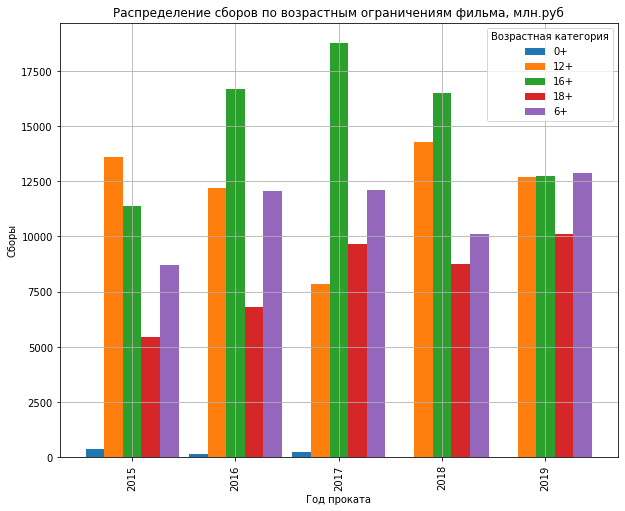

In [74]:
display(temp_1.max())
temp_1.plot(
    kind='bar', width=.9, figsize=(10, 8), grid=True, 
    title='Распределение сборов по возрастным ограничениям фильма, млн.руб',
    xlabel='Год проката', 
    ylabel='Сборы')
plt.legend(title='Возрастная категория');

In [75]:
temp.groupby('age_restriction').agg({'box_office': 'sum'})  # Сумма сборов по возрастным категорям начиная с 2015 года

,box_office
age_restriction,
0+,809.077426
12+,60619.446628
16+,76034.733644
18+,40759.615572
6+,55798.610800


In [76]:
temp.groupby('age_restriction').agg({'box_office': 'max'})  # максимальный сбор по 1 фильму за год с 2015 года

,box_office
age_restriction,
0+,206.478186
12+,3073.568691
16+,2576.613777
18+,1890.368076
6+,2779.686144


По построенной гистограмме видно, что начиная с 2015 года фильмы для публики старше 16 лет собирают больше всего денег в кинотеатре. Только в 2019 году сборы были чуть меньше, чем у категории "6+". Фильмы с ограничением 0+ почти не собирают денег, поскольку данная категория вообще не имеет смысла (в кинотеартры редко ходят зрители до 6 лет). Больше всего в прокате собрали денег фильмы 16+ (76 млрд.руб), при этом самые кассовые фильмы были с ограничением 6+ и 12+.

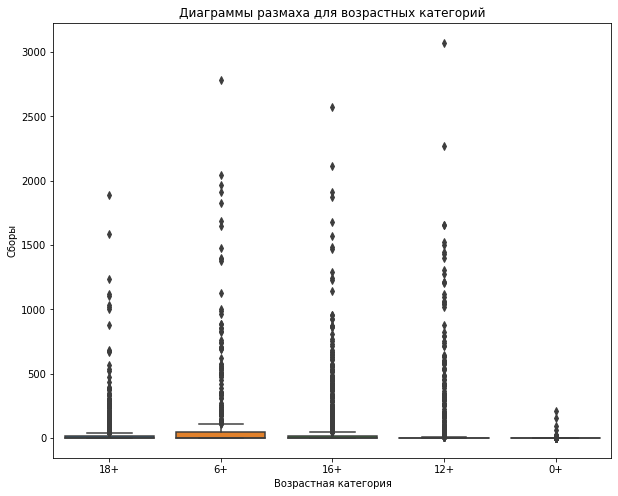

In [77]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=temp, x='age_restriction', y='box_office').set(
    title='Диаграммы размаха для возрастных категорий', xlabel='Возрастная категория', ylabel='Сборы');

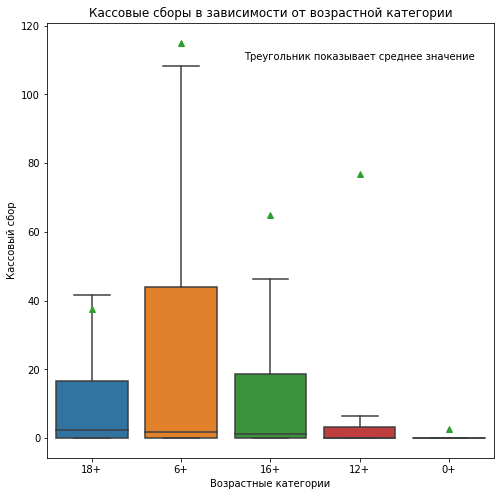

In [96]:
temp = data.copy()

# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))

# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))

plt.text(1.7, 110,'Треугольник показывает среднее значение')
plt.show()

В результате выполненного анализа можно сделать выводы, что наибольшее количество фильмов было выпущено в прокат в 2010, 2018 и 2019 годах, а наименьшее в 2017 году. Нетрудно заметить тенденцию роста (от года к году) как общего количества выпускаемых фильмов, так и количества фильмов с известными сборами. Отчасти просадка по фильмам в 2017 году может быть связана как со скандалами в голливуде (когда репутация киноиндустрии была подорвана), так и с проблемами в российской киноиндустрии (например скандал с "Матильдой"). Наибольшая доля фильмов с известнымми сборами приходится именно на 2017 год.
<br>Больше всех денег удалось собрать в 2018 году (49,7 млрд.руб). Меньше всех в 2010 (2,4 млн.руб). Во многом это связано с инфляцией (удорожанием билетов) и ростом раскрытия информации по сборам (ранее было приняты за 0 отсутствующие значения по сборам).
<br>До 2015 года медианное значение сборов = 0, т.е. до 2015 года больше половины фильмов не имели данных по сборам. Наибольшие же значения среднего и медианного значений характерны для 2017 года. Это связано с большим количеством фильмов, у которых известны сборы (не равны 0). В данных имеется большой размах по значениям в верхнюю сторону. Что вполне логично, т.к. большинство фильмов мало известны зрителю и собирают маленькую кассу и лишь некоторые хорошо известные фильмы зарабатывают много.
<br>Начиная с 2015 года фильмы для публики старше 16 лет собирают больше всего денег в кинотеатре. Только в 2019 году сборы были чуть меньше, чем у категории "6+". Фильмы с ограничением "0+" почти не собирают денег, поскольку данная категория вообще не имеет смысла (в кинотеартры редко ходят зрители до 6 лет). Больше всего в прокате собрали денег фильмы "16+" (76 млрд.руб), при этом самые кассовые фильмы были с ограничением "6+" и "12+".
</font>

## Исследование фильмов, которые получили государственную поддержку

Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [79]:
data_gp = data.query('financing_source != "нет"')   # df из фильмов с господдержкой
data_gp['budget'] = data_gp['budget']/1000000
data_gp.groupby('production_country')['budget'].count()

/tmp/ipykernel_126/3408568226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gp['budget'] = data_gp['budget']/1000000


production_country
Россия                                        316
Россия - Грузия                                 1
Россия, Армения                                 1
Россия, Бельгия, Финляндия                      1
Россия, Германия                                2
Россия, Германия, Великобритания                1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Италия                                  2
Россия, Латвия, Чешская Республика              1
Россия, Сербия                                  1
Россия, Украина, Польша                         1
Россия, Франция, Латвия                         1
Россия-Китай                                    1
Россия-Словакия-Чехия                           1
Россия-Украина                                  1
Name: budget, dtype: int64

Как видно господдержку получают также и фильмы, снятые несколькими государствами (помимо России), но таких фильмов всего по 1, 2 шт. на каждый комплект государств.

In [80]:
data_gp['budget'].describe()

count     332.000000
mean      136.001012
std       188.791201
min        12.552301
25%        46.158500
50%        75.000068
75%       154.431690
max      2305.074303
Name: budget, dtype: float64

In [81]:
data_gp['box_office'].describe()

count     332.000000
mean      126.847920
std       328.762574
min         0.000000
25%         0.909431
50%        12.144194
75%       103.107406
max      3073.568691
Name: box_office, dtype: float64

In [82]:
data_gp['ratings'].mean(), data.drop_duplicates(subset=['title'])['ratings'].mean()

(6.020886075949368, 6.462452700378396)

Средний бюджет на фильм с господдержкой составляет 131 млн.руб, а медианный - 71 млн.руб. При этом средние и медианные сборы равны 126 и 12 млн. руб. Средний рейтинг таких фильмов равен 6. При этом общий средний рейтинг по фильмам равен 6,5.

In [83]:
data_gp['first_genre'].value_counts()

драма          93
комедия        74
мультфильм     31
триллер        15
мелодрама      15
фэнтези        11
фантастика     11
ужасы          10
военный         9
приключения     7
семейный        7
боевик          6
детектив        5
мюзикл          4
история         4
детский         4
криминал        3
спорт           3
биография       3
реальное ТВ     1
Name: first_genre, dtype: int64

Наиболее активно бюджетные  средства выделяются на драмы и комедии.

Посмотрим, какой режиссер пользуется большой популярностью у государства и какие он приносит результаты.

In [84]:
data_gp['first_director'].value_counts().head()

Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
А.Котт           3
А.Аксененко      3
Name: first_director, dtype: int64

In [85]:
data_gp.query('first_director == "Р.Давлетьяров"')['box_office'].describe()

count      5.000000
mean      59.852586
std      105.941563
min        6.457303
25%       10.933432
50%       12.748398
75%       19.957031
max      249.166768
Name: box_office, dtype: float64

In [86]:
data_davletyarov = data_gp.query('first_director == "Р.Давлетьяров"')
display((data_davletyarov['budget']).describe())
round(data_davletyarov['support_share'].mean(), 2)

count      5.000000
mean     154.086047
std       47.543736
min      105.721524
25%      111.736163
50%      156.360666
75%      176.023490
max      220.588394
Name: budget, dtype: float64

0.57

In [87]:
len(data.query('first_director == "Р.Давлетьяров"'))

9

In [88]:
data.query('first_director == "Р.Давлетьяров"')['financing_source'].value_counts()

Фонд кино                4
нет                      4
Министерство культуры    1
Name: financing_source, dtype: int64

Можно сделать вывод, что режиссер Р.Давлетьяров чаще других финансируется государством (средняя доля государственных денег в бюджете = 57%), а большая часть его фильмов (5 из 9) снята при участии государства (4 из этих фильмов проспонсировал Фонд кино). При этом он является убыточным режиссером (средние сборы = 60 млн.руб при средних бюджетах фильма = 154 млн. руб.). Его фильмы не только не окупают общий бюджет, но даже государственную долю. 

In [89]:
data.query('production_country == "Россия"').pivot_table(
    index='first_director', values='ratings').sort_values(
    by='ratings', ascending=False).head(10)

,ratings
first_director,
Е.Шиляева,9.9
Т.Мирошник,9.9
А.Сазонов,9.8
И.Ромащенко,9.7
Д.Шабаев,9.4
Н.Иванова,9.1
М.Косырев-Нестеров,9.1
Н.Степанова при участии С.Иванова,9.0
М.Мошкова,9.0


За исключением тех режисеров, которые имеют рейтинг фильмов Ю 9,5 публике больше всего нравятся фильмы Д.Шабаева, Н.Ивановой, М.Косырева-Нестерова, Н.Степановой при участии С.Иванова, М.Мошковой. Имеет смысл проспонсировать именно их работы.

In [90]:
data_gp.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genre,support_share
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",16+,0,26500000,79.411900,Министерство культуры,8.1,"драма,мелодрама",0.365354,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,12+,0,26000000,37.142857,Министерство культуры,NaN,NaN,0.028140,2014,А.Якимчук,NaN,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",12+,0,107847945,176.023490,Фонд кино,5.3,"комедия,фантастика",19.957031,2013,Р.Давлетьяров,комедия,0.61


In [91]:
display(data_gp.query('box_office > budget')[['budget', 'ratings']].mean()) # Средний бюджет и рейтинг окупаемых фильмов
display(data_gp.query('box_office < budget')[['budget', 'ratings']].mean()) # Средний бюджет и рейтинг неокупаемых фильмов

budget     176.648141
ratings      6.145070
dtype: float64

budget     124.744884
ratings      5.984898
dtype: float64

Из 332 фильмов, которые получили господдержку только 72 фильма окупились (примерно 22%). Окупаемые фильмы в среденем стоят дороже неокупаемых на 52 млн. руб. А вот рейтинг их примерно одинаково низкий. Судя по всему лишние 52 млн.руб. идут не на качество фильма, а скорее на рекламу.

Из проведенного исследования видно, что господдержку получают также и фильмы, снятые несколькими государствами (помимо России), но таких фильмов всего по 1, 2 шт. на каждый комплект государств.
<br>Средний бюджет на фильм с господдержкой составляет 136 млн.руб, а медианный - 75 млн.руб. При этом средние и медианные сборы равны 127 и 12 млн. руб. Средний рейтинг таких фильмов равен 6. При этом общий средний рейтинг по всем фильмам равен 6,5.
<br>Наиболее активно бюджетные  средства выделяются на драмы и комедии.
<br>Режиссер Р.Давлетьяров чаще других финансируется государством (средняя доля государственных денег в бюджете = 57%), а большая часть его фильмов (5 из 9) снята при участии государства. При этом он является убыточным режиссером (средние сборы = 60 млн.руб при средних бюджетах фильма = 154 млн. руб.). Его фильмы не только не окупают общий бюджет, но даже государственную долю. 
<br>За исключением тех режисеров, которые имеют рейтинг фильмов Ю 9,5 публике больше всего нравятся фильмы Д.Шабаева, Н.Ивановой, М.Косырева-Нестерова, Н.Степановой при участии С.Иванова, М.Мошковой. Имеет смысл проспонсировать именно их работы.
<br>Из 332 фильмов, которые получили господдержку только 72 фильма окупились (примерно 22%). Более окупаемые фильмы в среденем стоят дороже неокупаемых на 52 млн. руб. А вот рейтинг их примерно одинаково низкий. Судя по всему лишние 52 млн.руб. идут не на качество фильма, а скорее на рекламу.

## Выводы по исследованию

**Общая информация о данных**
<br>В рамках проекта изучался рынок российского кинопроката. Уделялось особое внимание фильмам, которые получили государственную поддержку. 
<br>Данные, взятые для анализа, опубликованны на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Изначально данные состояли из двух датафреймов, которые были объеденены в один. Итоговый датафрейм состоит из 7486 строк. Все значения из файла mkrf_shows вошли в состав нового датафрейма, но не для всех значений из mkrf_movies нашлись значения в mkrf_shows.

**Проверка типов данных**
<br>В рамках проработки типов данных были выполнены следующие шаги:
1. Откорректированы значения в колонке *age_restriction*. Оставлено только количество лет, начиная с которых можно смотреть фильм;
2. Дата премьеры фильма приведена к приемлемому виду;
3. Изменен тип данных в колонке *ratings* на float. При этом значения рейтинга в процентах были переведены в дробные числа;
4. Изменен тип данных в колонках *refundable_support, nonrefundable_support, budget, box_office* на int (после заполнения пропусков).
<br>Поскольку сам по себе датафрей занимает мало памяти (877 кВ), то оптимизация по сокращению размера датафрейма не проводилась.

**Обработка пропусков в датафрейме**
<br>Пропущенны значения в колонках: *film_studio, production_country, director, producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office*.
<br>*film_studio*. Пропуски в данной колонке невозможно было восстановить, используя имеющиеся данные. Данные пропуски не будут играть большое значение в дальнейшем анализе, поэтому были заполнены значением "не определено".
<br>*production_country*. Оба фильма с пропусками в данной колонке были сняты в России, поэтому пропуски в данной колонке были заполнены значением "Россия".
<br>*director*. По большей части без режисеров концерты. Пропуски заполнены на "отсутствует".
<br>*producer*. Пропуски в этой колонке также заполнены значением "не определено".
<br>*refundable_support, nonrefundable_support, budget, financing_source*. Пропуски в данных колонках указывают на отсутствие российской господдержки у фильма. Пропущенные значения в колонках *refundable_support, nonrefundable_support, budget* были заменены на 0 (позже поменяем нули в budget на более адекватные значения), а в колонке *financing_source* на "нет". Колонки переведены в формат int.
<br>*ratings, genres*. Нет возможност заполнить по имеющимся данным. Пропуски были оставлены.
<br>*budget*. Пустые значения были заменены на суммарную господдержку + среднее значение прочих денег в фильмах.

**Обработка дубликатов в датафрейме**
<br>Полностью идентичных строк нет. Есть фильмы, которые имеют несколько дат проката. Скорее всего это вызвано повторными премьерами в кинотеатрах. Если у этих дублей колонки *title, financing_source, ratings, box_office* имеют идентичные значения, то такие дубликаты были удалены.

**Проверка категориальных значений**
<br>В ходе проверки категориальных столбцов обнаружилось, что в них имеет место проблема разного транслитерирования иностранных собственных имен, например режиссер двух фильмов "Анализируй это!" и "Анилизируй то!" в одном случае записан как Гарольд Реймис, а в другом как ХЭрольд Рэмис. Помимо этого где-то указаны инициалы вместо имен, а где то полные имена. Также много строк, где указано несколько режиссеров, продюссеров и студий. В колонке *type* удалены пробелы перед типом некоторых фильмов.
<br>Полностью идентичных строк нет. Есть фильмы, которые имеют несколько дат проката. Скорее всего это вызвано повторными премьерами в кинотеатрах. Имеются строки с одинаковыми значениями в колонках *title, financing_source, ratings, box_office*.
<br>Есть два дубликата с идентичными номерами прокатных удостоверений, но разными фильмами. Возможно произошла ошибка при сборе данных, либо фильмы выпускались в прокат по одоному удостоверению (если такое возможно). В будущем колонка *puNumber* не будет использоваться для анализа, поэтому номера оставлены без изменений.
<br>Имеется большое количество фильмов, которые выпускались в прокат повторно, но удалить их было нельзя, поскольку их много (более 6%).


**Проверка количественных значений**
<br> Среди количественных значений были обнаружены аномалии: нулевые сборы у фильмов, слишком высокие рейтинги, связанные с работой алгоритмов Кинопоиска.

**Добавление новых столбцов**
<br>С целью проведения дальнешего анализа был созданы: столбец с информацией о годе проката; два столбца с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно; столбец с долей государственной поддержки в общем бюджете фильма.

**Исследовательский анализ данных**
<br>Больше всех денег удалось собрать в 2018 году (49,7 млрд.руб). Меньше всех в 2010 (2,4 млн.руб). Во многом это связано с инфляцией (удорожанием билетов) и ростом раскрытия информации по сборам (ранее было приняты за 0 отсутствующие значения по сборам).
<br>До 2015 года медианное значение сборов = 0, т.е. до 2015 года больше половины фильмов не имели данных по сборам. Наибольшие же значения среднего и медианного значений характерны для 2017 года. Это связано с большим количеством фильмов, у которых известны сборы (не равны 0).
<br>Имеется большой разрыв между медиаными и средними значениями по сборам. Даже с исключенными строками с неизвестными сборами разница огромна. Можно сделать вывод, что в данных имеется большой размах по значениям в верхнюю сторону. Что вполне логично, т.к. большинство фильмов мало известны зрителю и собирают маленькую кассу и лишь некоторые хорошо известные фильмы зарабатывают много.
<br>По построенной гистограмме видно, что начиная с 2015 года фильмы для публики старше 16 лет собирают больше всего денег в кинотеатре. Только в 2019 году сборы были чуть меньше, чем у категории "6+". Фильмы с ограничением 0+ почти не собирают денег, поскольку данная категория вообще не имеет смысла (в кинотеартры редко ходят зрители до 6 лет). Больше всего в прокате собрали денег фильмы 16+ (76 млрд.руб), при этом самые кассовые фильмы были с ограничением 6+ и 12+.

**Исследование фильмов, которые получили государственную поддержку**
<br>Господдержку получают также и фильмы, снятые несколькими государствами (помимо России), но таких фильмов всего по 1, 2 шт. на каждый комплект государств.
<br>Средний бюджет на фильм с господдержкой составляет 131 млн.руб, а медианный - 71 млн.руб. При этом средние и медианные сборы равны 126 и 12 млн. руб. Средний рейтинг таких фильмов равен 6. При этом общий средний рейтинг по фильмам равен 6,5.
<br>Наиболее активно бюджетные средства выделяются на драмы и комедии.
<br>Режиссер Р.Давлетьяров чаще других финансируется государством (средняя доля государственных денег в бюджете = 57%), а большая часть его фильмов (5 из 9) снята при участии государства (4 из этих фильмов проспонсировал Фонд кино). При этом он является убыточным режиссером (средние сборы = 60 млн.руб при средних бюджетах фильма = 154 млн. руб.). Его фильмы не только не окупают общий бюджет, но даже государственную долю. 
<br>За исключением тех режисеров, которые имеют рейтинг фильмов Ю 9,5 публике больше всего нравятся фильмы Д.Шабаева, Н.Ивановой, М.Косырева-Нестерова, Н.Степановой при участии С.Иванова, М.Мошковой. Имеет смысл проспонсировать именно их работы.
<br>Из 332 фильмов, которые получили господдержку только 72 фильма окупились (примерно 22%). Более окупаемые фильмы в среденем стоят дороже неокупаемых на 52 млн. руб. А вот рейтинг их примерно одинаково низкий. Судя по всему лишние 52 млн.руб. идут не на качество фильма, а скорее на рекламу.